# Proyecto Hermes

In [1]:
import numpy as np

## Crear objeto Hermes y agregar filtros

In [2]:
from Hermes import Hermes
myHermes = Hermes()
myHermes.addFilter('cone_search')
myHermes.addFilter('ra', '12:26:27.011') # SN 2021J
myHermes.addFilter('dec','+31:13:20.55')
myHermes.addFilter('radius', 10.0)


myHermes.addLocalService('datos/lc_HD52504.tess', ',', True) # usar columnas del archivo
myHermes.addLocalService('datos/lc_HD113016.tess',',', True)


In [3]:
myHermes.getLocalServices()

[{'path': 'datos/lc_HD52504.tess',
  'column_available': ',',
  'separator': True,
  'column_names': [],
  'header': None},
 {'path': 'datos/lc_HD113016.tess',
  'column_available': ',',
  'separator': True,
  'column_names': [],
  'header': None}]

In [4]:
myHermesBox = Hermes()
myHermesBox.addFilter('box_search')
myHermesBox.addFilter('ra', '12:26:27.011') # SN 2021J
myHermesBox.addFilter('dec','+31:13:20.55')
myHermesBox.addFilter('height', 10.0)
myHermesBox.addFilter('width', 10.0)

In [5]:
# notar que se manejan algunos errores
#myHermes.addFilter('cone_searcha')


### Ver filtros 

In [6]:
myHermes.getFilters()


{'search_type': {'type': 'cone_search', 'radius': 10.0},
 'ra/dec': ['12:26:27.011', '+31:13:20.55'],
 'local_services': [{'path': 'datos/lc_HD52504.tess',
   'column_available': ',',
   'separator': True,
   'column_names': [],
   'header': None},
  {'path': 'datos/lc_HD113016.tess',
   'column_available': ',',
   'separator': True,
   'column_names': [],
   'header': None}]}

## Empezar consulta 

In [7]:
my_query = myHermes.startQuery()
print(len(my_query))
print(my_query.keys())


datos/lc_HD52504.tess
datos/lc_HD113016.tess
{'OAC': <Services.OAC.QueryOAC object at 0x7f8163388d60>, 'MAST': <Services.MAST.QueryMAST object at 0x7f8163388520>, 'IRSA': <Services.IRSA.QueryIRSA object at 0x7f81633883a0>, 'SIMBAD': <Services.SIMBAD.QuerySIMBAD object at 0x7f8163388130>}
OAC
Start query OAC
query  timeseries
MAST
Start query MAST
query  timeseries
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc.fits with expected size 80640. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc.txt with expected size 54085. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346910_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346910_tess_v01_llc.fits with expected size 80640. [astroquery.query]
INFO: Found cached file ./ma

### Resultados Local Services

In [8]:
print(myHermes.getLocalTables())

{'timeseries': [{'data': <QTable length=1086>
        JD             flux_norm             err        
     float64            float64            float64      
------------------ ------------------ ------------------
1491.6619873046875 0.8729673510604121 0.0001846194582269
1491.6828002929688 0.8648383065647338 0.0001836920843002
1491.7036743164062 0.8678954265879731 0.0001837598679552
1491.7244873046875 0.8824183811334442 0.0001848925360087
1491.7453002929688 0.9040013234265356 0.0001866530450593
1491.7661743164062 0.9315999856513022 0.0001890035760951
1491.7869873046875 0.9591754025770918  0.000191343905532
1491.8078002929688 0.9850872823938828 0.0001934771338832
1491.8286743164062 1.0052710574528625 0.0001950612465273
               ...                ...                ...
 1515.890869140625 0.9043156797744164 0.0001851920280776
1515.9116821289062 0.9268703845270752 0.0001872700987848
1515.9325561523438 0.9556329461357636  0.000189927694772
 1515.953369140625 0.9838813417075148 0.00

### Resultados MAST

In [9]:
print(len(my_query['MAST']['timeseries']))

table = 2 # 0, 1, 2, 3
print(my_query['MAST']['timeseries'][table]['data'].columns)
print(my_query['MAST']['timeseries'][table]['data'][0])

4
ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD-2457000, days'
    name = 'CADENCENO'; format = 'J'
    name = 'SAP_FLUX'; format = 'E'
    name = 'KSPSAP_FLUX'; format = 'E'
    name = 'KSPSAP_FLUX_ERR'; format = 'E'
    name = 'QUALITY'; format = 'J'
    name = 'ORBITID'; format = 'J'
    name = 'SAP_X'; format = 'E'; unit = 'pixel'
    name = 'SAP_Y'; format = 'E'; unit = 'pixel'
    name = 'SAP_BKG'; format = 'E'
    name = 'SAP_BKG_ERR'; format = 'E'
    name = 'KSPSAP_FLUX_SML'; format = 'E'
    name = 'KSPSAP_FLUX_LAG'; format = 'E'
)
(1899.3278566379097, 32249, 1.0163412, 1.0193248, 0.004611713, 4096, 51, 1223.9897, 235.11156, -4059.67, 1149.15, 1.032227, 1.0168612)


In [10]:
print(len(my_query['MAST']['spectrum']))

table = 2 # 0, 1, 2, 3
print(my_query['MAST']['spectrum'][table]['header'][0:3])
print(my_query['MAST']['spectrum'][table]['data'][0])

13
XTENSION= 'BINTABLE'           / extension type                                 BITPIX  =                    8 / bits per data value                            NAXIS   =                    2 / number of data axes                            END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Resultados OAC

In [11]:
print(len(my_query['OAC']['timeseries']))

table = 0 
print(my_query['OAC']['timeseries'][table]['data'].columns)
print(my_query['OAC']['timeseries'][table]['data'])

1
<TableColumns names=('event','time','magnitude','e_magnitude','band','instrument')>
 event    time  magnitude e_magnitude band instrument
------- ------- --------- ----------- ---- ----------
SN2021J 59228.5      12.5                            


### Resultados SIMBAD

In [12]:
print(len(my_query['SIMBAD']['timeseries']))

table = 0 # 0 
print(my_query['SIMBAD']['timeseries'][table]['data'].columns)
print(my_query['SIMBAD']['timeseries'][table]['data'])

1
<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','SCRIPT_NUMBER_ID')>
   MAIN_ID         RA          DEC      RA_PREC DEC_PREC ... COO_ERR_ANGLE COO_QUAL COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
                "h:m:s"      "d:m:s"                     ...      deg                                                                  
------------- ------------ ------------ ------- -------- ... ------------- -------- -------------- ------------------- ----------------
     SN 2021J 12 26 27.030 +31 13 20.59       7        7 ...             0        D                2021ATel14300....1S                1
[TSK2008] 149   12 26 27.0    +31 13 21       5        5 ...             0        D              O 2013AJ....146...86T                1
     SN 1974G   12 26 27.1    +31 13 24       5        5 ...             0        D                2018MNRAS.481..566K                1
    NGC  4

### Resultados IRSA

In [13]:
print(len(my_query['IRSA']['timeseries']))

table = 0 # 0 
print(my_query['IRSA']['timeseries'][table]['data'].columns)
print(my_query['IRSA']['timeseries'][table]['data'])

1
<TableColumns names=('obsmjd','mag_autocorr','magerr_auto','oid','ra','dec','clon','clat','fid','transient_flag','astrometricrms','nobs','ngoodobs','nbestobs','referencemag','referencemagerr','medianmag','bestmedianmag','meanmag','bestmeanmag','magrms','bestmagrms','sid','s_ra','s_dec','ptffield','ccdid','hmjd','nid','mag_auto','limitmag','absphotzp','fwhmsex','fwhm_image','qaflags','flags','photcalflag','goodflag','pid','dist','angle')>
     obsmjd      mag_autocorr magerr_auto      oid            ra         dec     ... photcalflag   goodflag    pid      dist     angle   
      days           mag          mag                      degrees     degrees   ... 0=No, 1=Yes 0=No, 1=Yes           arcsec     deg    
---------------- ------------ ----------- -------------- ----------- ----------- ... ----------- ----------- -------- -------- ----------
 56385.229587200        9.937       0.078 40572010002948 186.6125650  31.2230470 ...           1           1 15713250 2.400263   1.101742
 563

### Resultados (Encapsulado)

In [14]:
myHermes.getTables('SIMBAD', 'timeseries')[0]['data']

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
SN 2021J,12 26 27.030,+31 13 20.59,7,7,--,--,0,D,,2021ATel14300....1S,1
[TSK2008] 149,12 26 27.0,+31 13 21,5,5,--,--,0,D,O,2013AJ....146...86T,1
SN 1974G,12 26 27.1,+31 13 24,5,5,--,--,0,D,,2018MNRAS.481..566K,1
NGC 4414,12 26 27.089,+31 13 24.76,7,7,--,--,0,C,I,2006AJ....131.1163S,1
[S96c] C6,12 26 27.1,+31 13 12,5,5,--,--,0,D,,,1


In [15]:
print(len(myHermes.getTables('MAST', 'spectrum')))
table = 0
myHermes.getTables('MAST', 'spectrum')[table]['data']

13


array([[  -3.7661755 ,    4.63211   ,   75.26402   , ...,   15.336566  ,
          11.698571  ,   -4.98021   ],
       [ -12.872608  ,  -13.997243  ,   -3.996764  , ...,   -2.3531213 ,
          14.705198  ,   18.89625   ],
       [  -7.553865  ,   -9.887601  ,    9.030548  , ...,   -0.47453126,
          -7.4499264 ,    3.7920487 ],
       ...,
       [   0.61482066,   -0.362286  ,   -5.9483128 , ...,  -10.758961  ,
           6.735021  ,    1.1061703 ],
       [   5.0709934 ,    7.9792285 ,   10.928163  , ...,   11.855836  ,
          -0.786982  ,   -8.189329  ],
       [-264.11307   , -236.59949   , -228.88373   , ..., -163.5431    ,
        -157.02194   , -332.60007   ]], dtype=float32)

# Visualization

### Sky

In [16]:
myHermes.generateVisualization('sky')


Box(children=(Aladin(fov=0.2, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov', '…

### Spectrum

13


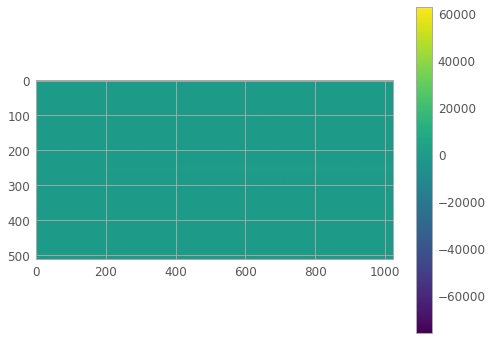

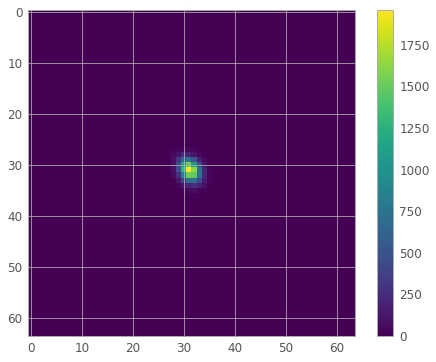

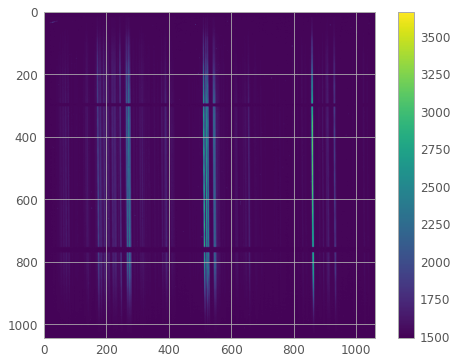

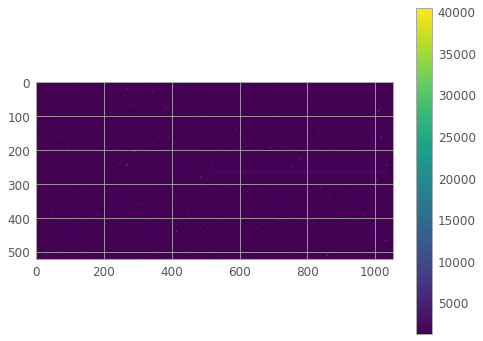

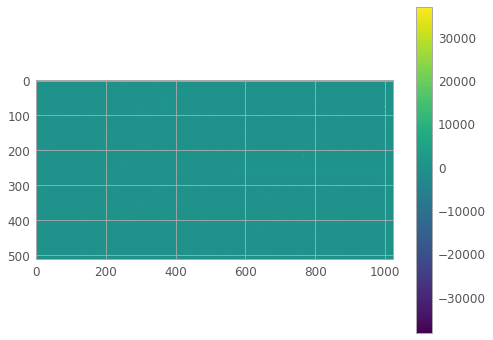

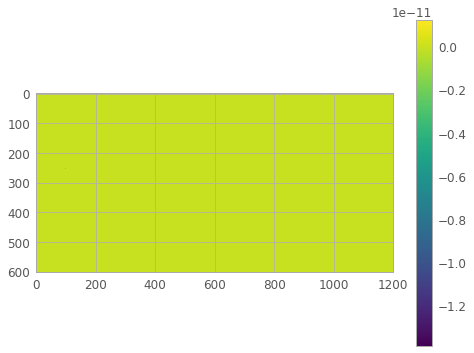

In [17]:
myHermes.generateVisualization('spectrum')

# TO-DO: poner legenda que indique el objeto

## Guardar y cargar objeto Hermes

In [18]:
myHermes.saveHermes()


{'search_type': {'type': 'cone_search', 'radius': 10.0}, 'ra/dec': ['12:26:27.011', '+31:13:20.55'], 'local_services': [{'path': 'datos/lc_HD52504.tess', 'column_available': ',', 'separator': True, 'column_names': [], 'header': None}, {'path': 'datos/lc_HD113016.tess', 'column_available': ',', 'separator': True, 'column_names': [], 'header': None}]}


In [19]:
aux=Hermes()
aux.loadHermes("save.Hermes")
aux.getFilters()

{'search_type': {'type': 'cone_search', 'radius': 10.0},
 'ra/dec': ['12:26:27.011', '+31:13:20.55'],
 'local_services': [{'path': 'datos/lc_HD52504.tess',
   'column_available': ',',
   'separator': True,
   'column_names': [],
   'header': None},
  {'path': 'datos/lc_HD113016.tess',
   'column_available': ',',
   'separator': True,
   'column_names': [],
   'header': None}]}

In [20]:
my_query_ = aux.startQuery()


datos/lc_HD52504.tess
datos/lc_HD113016.tess
{'OAC': <Services.OAC.QueryOAC object at 0x7f81609a3b20>, 'MAST': <Services.MAST.QueryMAST object at 0x7f81609a30a0>, 'IRSA': <Services.IRSA.QueryIRSA object at 0x7f81609a3af0>, 'SIMBAD': <Services.SIMBAD.QuerySIMBAD object at 0x7f8160ab4e20>}
OAC
Start query OAC
query  timeseries
MAST
Start query MAST
query  timeseries
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc.fits with expected size 80640. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346904_tess_v01_llc.txt with expected size 54085. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_qlp_tess_ffi_s0022-0000000082346910_tess_v01_llc/hlsp_qlp_tess_ffi_s0022-0000000082346910_tess_v01_llc.fits with expected size 80640. [astroquery.query]
INFO: Found cached file ./ma